<center><h2> The Quantum Eigenvalue Problem</h2></center>

The quantum eigenvalue problem is solved by   matching the left and right wavefunctionsfrom a potential well, and using  bisection algorithm. The plots are made with MatPlotLib.  

Iteration, E = 0 -17.077272727272728
Iteration, E = 1 -16.26590909090909
Iteration, E = 2 -15.860227272727272
Iteration, E = 3 -16.06306818181818
Iteration, E = 4 -15.961647727272727
nL 501


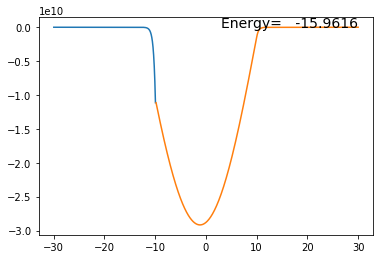

Iteration, E = 5 -15.9109375
nL 501


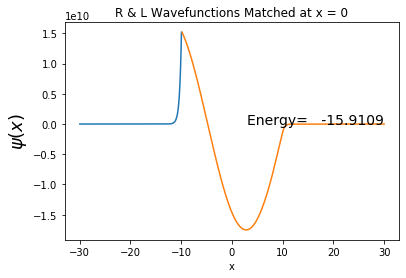

Iteration, E = 6 -15.936292613636363
nL 501


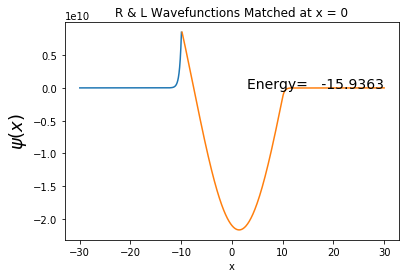

Iteration, E = 7 -15.948970170454544
nL 501


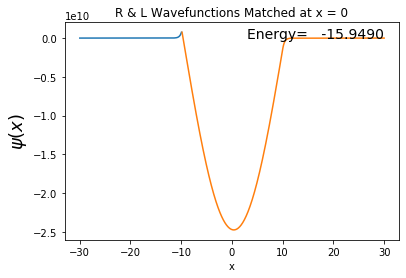

Iteration, E = 8 -15.955308948863635
nL 501


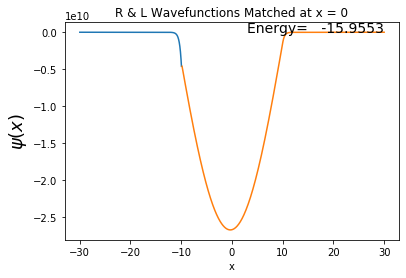

Iteration, E = 9 -15.95213955965909
Final eigenvalue E = -15.95213955965909
Iterations =  9 , max =  100


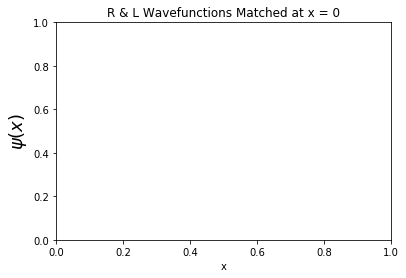

In [1]:
""" From "COMPUTATIONAL PHYSICS" & "COMPUTER PROBLEMS in PHYSICS"
    by RH Landau, MJ Paez, and CC Bordeianu (deceased).
    Copyright R Landau, Oregon State Unv, MJ Paez, Univ Antioquia, 
    C Bordeianu, Univ Bucharest, 2021. 
    Please respect copyright & acknowledge our work."""

#QuantumEigen.ipynb: solution of eigenvalue problem for a potential well

%matplotlib inline

 
 
from numpy import *
import numpy as np, matplotlib.pyplot as plt
# from rk4Algor import rk4Algor

eps = 1e-1; Nsteps = 501;  h=0.04; Nmax = 100  
E = -17.; Emax = 1.1*E;  Emin = E/1.1       # Init E & limits
# m/(hbar*c)**2 = 940MeV/(197.33MeV-fm)**2 = 0.4829 
    
def f(x, y):        # RHS for ODE
    global E
    F = zeros((2), float)
    F[0] = y[1]
    F[1] = -(0.4829)*(E-V(x))*y[0]
    return F

def V(x):                   # Potential 
    if (abs(x) < 10.):  return (-16.0)              
    else:               return (0.)
				
def rk4Algor(t, h, N, y, f):
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N);
    k1 = h*f(t,y)                             
    k2 = h*f(t+h/2.,y+k1/2.)
    k3= h*f(t+h/2.,y+k2/2.)
    k4= h*f(t+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y    
    
def diff(h,E):                           # Change in log deriv
    y = zeros((2),float)
    i_match = Nsteps//3                     # Matching radius
    nL = i_match + 1  
    y[0] = 1.E-15;                          # Initial left wf
    y[1] = y[0]*sqrt(-E*0.4829)    
    for ix in range(0,nL + 1):
        x = h * (ix  -Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    left = y[1]/y[0]                       # Log  derivative
    y[0] = 1.E-15;         #  Slope for even; reverse if odd
    y[1] = -y[0]*sqrt(-E*0.4829)           # Initialize R wf
    for ix in range( Nsteps,nL+1,-1):
        x = h*(ix+1-Nsteps/2)
        y = rk4Algor(x, -h, 2, y, f)
    right = y[1]/y[0]                       # Log derivative
    return( (left - right)/(left + right) )
		
def plot(h):                   # Repeat integrations for plot
    global xL,xR,Rwf,Lwf
    x = 0.       # matching point 
    Lwf = []       # left wave function
    Rwf = []       # Right wave function
    xR = []        # x for right wf
    xL = []    
    Nsteps = 1501                         # Integration steps
    y = zeros((2),float)
    yL = zeros((2,505),float) 
    i_match = 500                           # Matching radius
    nL = i_match + 1;  
    print('nL',nL)
    y[0] = 1.E-40                           # Initial left wf
    y[1] = -sqrt(-E*0.4829) *y[0]
    for ix in range(0,nL+1):                          
        yL[0][ix] = y[0]
        yL[1][ix] = y[1]
        x = h * (ix -Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    y[0] = -1.E-15         # - slope: even;  reverse if odd
    y[1] = -sqrt(-E*0.4829)*y[0]
    for ix in range(Nsteps -1,nL + 2,-1):        # Right WF
        x = h * (ix + 1 -Nsteps/2)          # Integrate in
        y = rk4Algor(x, -h, 2, y, f) 
        xR.append(x)
        Rwf.append (y[0] )
    x = x-h              
    normL = y[0]/yL[0][nL]
    for ix in range(0,nL+1):   # Normalize L wf & derivative
        x = h * (ix-Nsteps/2 + 1) 
        y[0] = yL[0][ix]*normL 
        y[1] = yL[1][ix]*normL
        xL.append(x)
        Lwf.append(y[0])        # Factor for scale   
fig = plt.figure()                        
ax = fig.add_subplot(111)
ax.grid()        #j +=1

for count in range(0,Nmax):              # Main program
    E = (Emax + Emin)/2.                  # Bisec E range
    Diff = diff(h,E)
    Etemp = E
    E = Emax
    diffMax = diff(h,E)
    E = Etemp
    if (diffMax*Diff > 0):  Emax = E    # Bisection algor
    else:                   Emin = E
    print("Iteration, E =", count,  E)
    if ( abs(Diff)  <  eps ):     break
    if count >3: 
       fig.clear()     #erases previous figure                         
       plot(h)
       plt.plot(xL,Lwf)
       plt.plot(xR,Rwf)
       plt.text(3,-200,'Energy= %10.4f'%(E),fontsize=14)
       plt.pause(0.8)  # Pause to delay figures
    plt.xlabel('x')
    plt.ylabel('$\psi(x) $',fontsize=18)
    plt.title('R & L Wavefunctions Matched at x = 0')
  
print("Final eigenvalue E =", E)
print("Iterations = ",count,", max = ", Nmax)
plt.show()